In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings 
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('./data/salary.csv', index_col=0)

print(df)
print(df.columns)

             workclass  fnlwgt    education  education-num   
age                                                          
39           State-gov   77516    Bachelors             13  \
50    Self-emp-not-inc   83311    Bachelors             13   
38             Private  215646      HS-grad              9   
53             Private  234721         11th              7   
28             Private  338409    Bachelors             13   
..                 ...     ...          ...            ...   
27             Private  257302   Assoc-acdm             12   
40             Private  154374      HS-grad              9   
58             Private  151910      HS-grad              9   
22             Private  201490      HS-grad              9   
52        Self-emp-inc  287927      HS-grad              9   

          marital-status          occupation    relationship    race      sex   
age                                                                             
39         Never-married       

In [9]:
print(df.iloc[0])
print(df.iloc[:, 0])

print(df.dtypes.head(8))

workclass              State-gov
fnlwgt                     77516
education              Bachelors
education-num                 13
marital-status     Never-married
occupation          Adm-clerical
relationship       Not-in-family
race                       White
sex                         Male
capital-gain                2174
capital-loss                   0
hours-per-week                40
native-country     United-States
salary                     <=50K
Name: 39, dtype: object
age
39            State-gov
50     Self-emp-not-inc
38              Private
53              Private
28              Private
            ...        
27              Private
40              Private
58              Private
22              Private
52         Self-emp-inc
Name: workclass, Length: 32561, dtype: object
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object


In [12]:
# Work with data
#print(columns, columns[0])
list_with_obj_name = []
for ind, name in enumerate(df.columns):
    #if (df[columns[i]].dtype == 'object'):
    print(f'{ind + 1}. for column {name} dtype is {df[name].dtype}')
    if df[name].dtype == "object":
        list_with_obj_name.append(name)


1. for column workclass dtype is object
2. for column fnlwgt dtype is int64
3. for column education dtype is object
4. for column education-num dtype is int64
5. for column marital-status dtype is object
6. for column occupation dtype is object
7. for column relationship dtype is object
8. for column race dtype is object
9. for column sex dtype is object
10. for column capital-gain dtype is int64
11. for column capital-loss dtype is int64
12. for column hours-per-week dtype is int64
13. for column native-country dtype is object
14. for column salary dtype is object
             workclass  fnlwgt    education  education-num   
age                                                          
39           State-gov   77516    Bachelors             13  \
50    Self-emp-not-inc   83311    Bachelors             13   
38             Private  215646      HS-grad              9   
53             Private  234721         11th              7   
28             Private  338409    Bachelors             

<h4>Columns of our dataset are not valid for now</h4>
<h4>Let's use encoder</h4>

In [11]:


for ind, name in enumerate(list_with_obj_name):
    

ValueError: could not convert string to float: ' State-gov'

In [ ]:
df.groupby(by=['Region_label']).corr()

weight       age        height      base   
Region_label                                                                   
0            weight           1.000000e+00 -0.209886 -3.973866e-01  0.036669  \
             age             -2.098859e-01  1.000000  5.902324e-01 -0.003798   
             height          -3.973866e-01  0.590232  1.000000e+00 -0.534511   
             base             3.666870e-02 -0.003798 -5.345114e-01  1.000000   
             year             5.378445e-01  0.331049 -1.139190e-01  0.122620   
             personal_weigth -5.645369e-01  0.486098  8.365271e-01 -0.307038   
             in_row           1.967834e-01  0.566839  4.477672e-01 -0.061327   
1            weight           1.000000e+00 -0.400503 -8.258813e-01  0.123237   
             age             -4.005030e-01  1.000000  1.465029e-01  0.057560   
             height          -8.258813e-01  0.146503  1.000000e+00 -0.149110   
             base             1.232367e-01  0.057560 -1.491101e-01  1.000000   
             year             4.473782e-01 -0.118473 -1.397039e-01  0.064663   
             personal_weigth -8.230231e-01  0.391518  7.295142e-01 -0.060042   
             in_row           3.627179e-01  0.019358 -2.951346e-01  0.246496   
2            weight           1.000000e+00 -0.285536 -5.697503e-01  0.119575   
             age             -2.855359e-01  1.000000  2.196550e-01 -0.165089   
             height          -5.697503e-01  0.219655  1.000000e+00  0.105307   
             base             1.195750e-01 -0.165089  1.053068e-01  1.000000   
             year             3.050249e-01  0.444144 -5.391368e-02 -0.129619   
             personal_weigth -7.755656e-01  0.317547  7.750796e-01  0.007644   
             in_row           1.060701e-01  0.110481 -1.234019e-01  0.078409   
3            weight           1.000000e+00 -0.848007 -9.683297e-01       NaN   
             age             -8.480073e-01  1.000000  7.027696e-01       NaN   
             height          -9.683297e-01  0.702770  1.000000e+00       NaN   
             base                      NaN       NaN           NaN       NaN   
             year            -5.019898e-15  0.236801  6.512232e-15       NaN   
             personal_weigth -9.924596e-01  0.899729  9.304248e-01       NaN   
             in_row           3.711731e-01 -0.161289 -3.269892e-01       NaN   
4            weight           1.000000e+00  0.876062 -1.000000e+00 -1.000000   
             age              8.760617e-01  1.000000 -8.760617e-01 -0.876062   
             height          -1.000000e+00 -0.876062  1.000000e+00  1.000000   
             base            -1.000000e+00 -0.876062  1.000000e+00  1.000000   
             year             6.993010e-01  0.957320 -6.993010e-01 -0.699301   
             personal_weigth -1.000000e+00 -0.876062  1.000000e+00  1.000000   
             in_row           3.676073e-01  0.758048 -3.676073e-01 -0.367607   

                                      year  personal_weigth    in_row  
Region_label                                                           
0            weight           5.378445e-01    -5.645369e-01  0.196783  
             age              3.310489e-01     4.860983e-01  0.566839  
             height          -1.139190e-01     8.365271e-01  0.447767  
             base             1.226203e-01    -3.070381e-01 -0.061327  
             year             1.000000e+00    -1.539640e-01  0.309751  
             personal_weigth -1.539640e-01     1.000000e+00  0.211581  
             in_row           3.097512e-01     2.115810e-01  1.000000  
1            weight           4.473782e-01    -8.230231e-01  0.362718  
             age             -1.184735e-01     3.915180e-01  0.019358  
             height          -1.397039e-01     7.295142e-01 -0.295135  
             base             6.466258e-02    -6.004214e-02  0.246496  
             year             1.000000e+00    -2.597286e-01  0.216984  
             personal_weigth -2.597286e-01     1.000000e+00 -0.2071

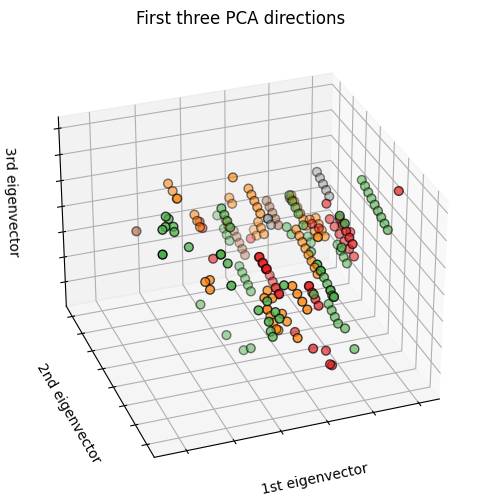

In [ ]:
X = df.drop(columns='Region_label')
y = df['Region_label']

#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(df)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

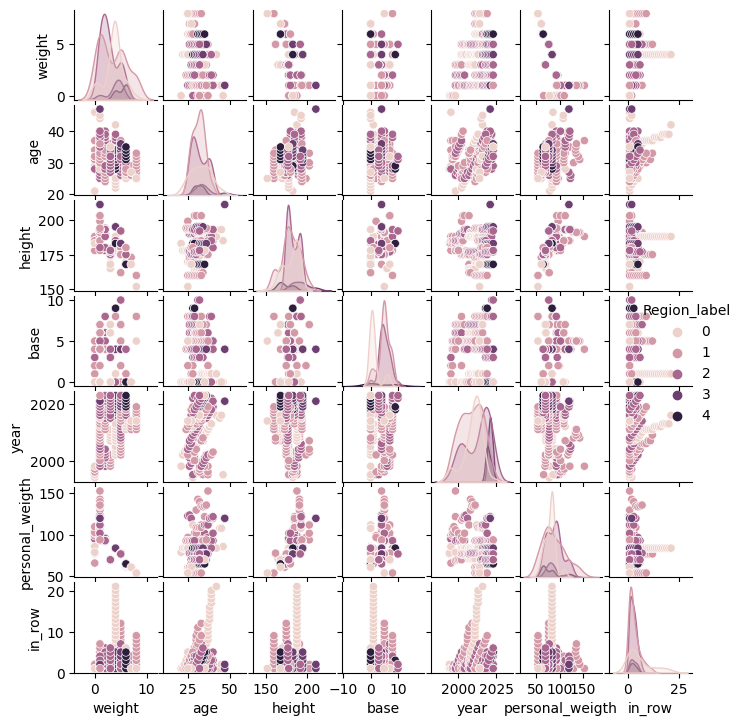

In [ ]:
cols = list(df.columns.values)
fig = sns.pairplot(data = df[cols], hue="Region_label")
fig.fig.set_size_inches(7,7)

<h4>Test for most popular models</h4><br>
models - SVM, LDA, RandomForest<br>
Also, it's posible to use GreadSearch

In [ ]:
# Models fiting and imagineshion
#X_train, X_test, y_train, y_test
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Обучаем на тренировочных данных
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Действующая классификация
rf_predictions = model.predict(X_test)
# Вероятности для каждого класса
rf_probs = model.predict_proba(X_test)[:, 1]

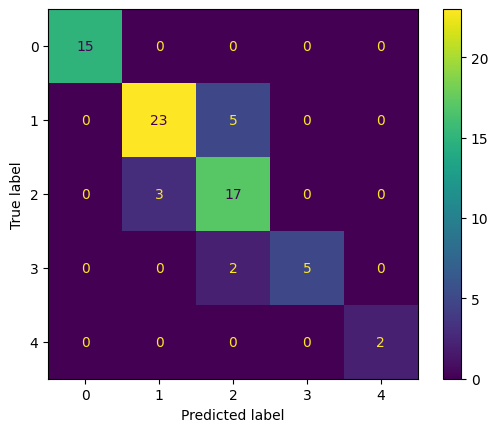

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred = rf_predictions)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)

vis.plot()
plt.show()

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, rf_predictions)
# Calculate the precision
precision = precision_score(y_test, rf_predictions, pos_label='positive',
                                           average='micro')
# Calculate the recall
recall = recall_score(y_test, rf_predictions, pos_label='positive',
                                           average='micro')
# Calculate the f1 score
f1 = f1_score(y_test, rf_predictions, pos_label='positive',
                                           average='micro')